age = age of the person
sex = gender of the person
cp = chest pain type
trtbps = resting blood presure
chol = cholestoral in mg/dl fetched via BMI sensor
fbs = fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg = resting electrocardiographic results
thalachh = maximum heart rate achieved
exng = exercise induced angina (1 = yes; 0 = no)
oldpeak = Previous peak

In [4]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
data.shape

(303, 14)

In [7]:
feature_cols = ['trtbps','age','sex','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

In [8]:
X = data[feature_cols]

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [10]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.76395577,  0.9521966 ,  0.68100522, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-0.09273778, -1.91531289,  0.68100522, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-0.09273778, -1.47415758, -1.46841752, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 0.70684287,  1.50364073,  0.68100522, ..., -0.64911323,
         1.24459328,  1.12302895],
       [-0.09273778,  0.29046364,  0.68100522, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.09273778,  0.29046364, -1.46841752, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [11]:
y = data.output

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = logreg.fit(X_train,y_train)

In [15]:
y_pred=logreg.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1]


In [16]:
lr.score(X_test, y_test)

0.7763157894736842

In [17]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22, 11],
       [ 6, 37]], dtype=int64)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Pairplot of Variables by Output')

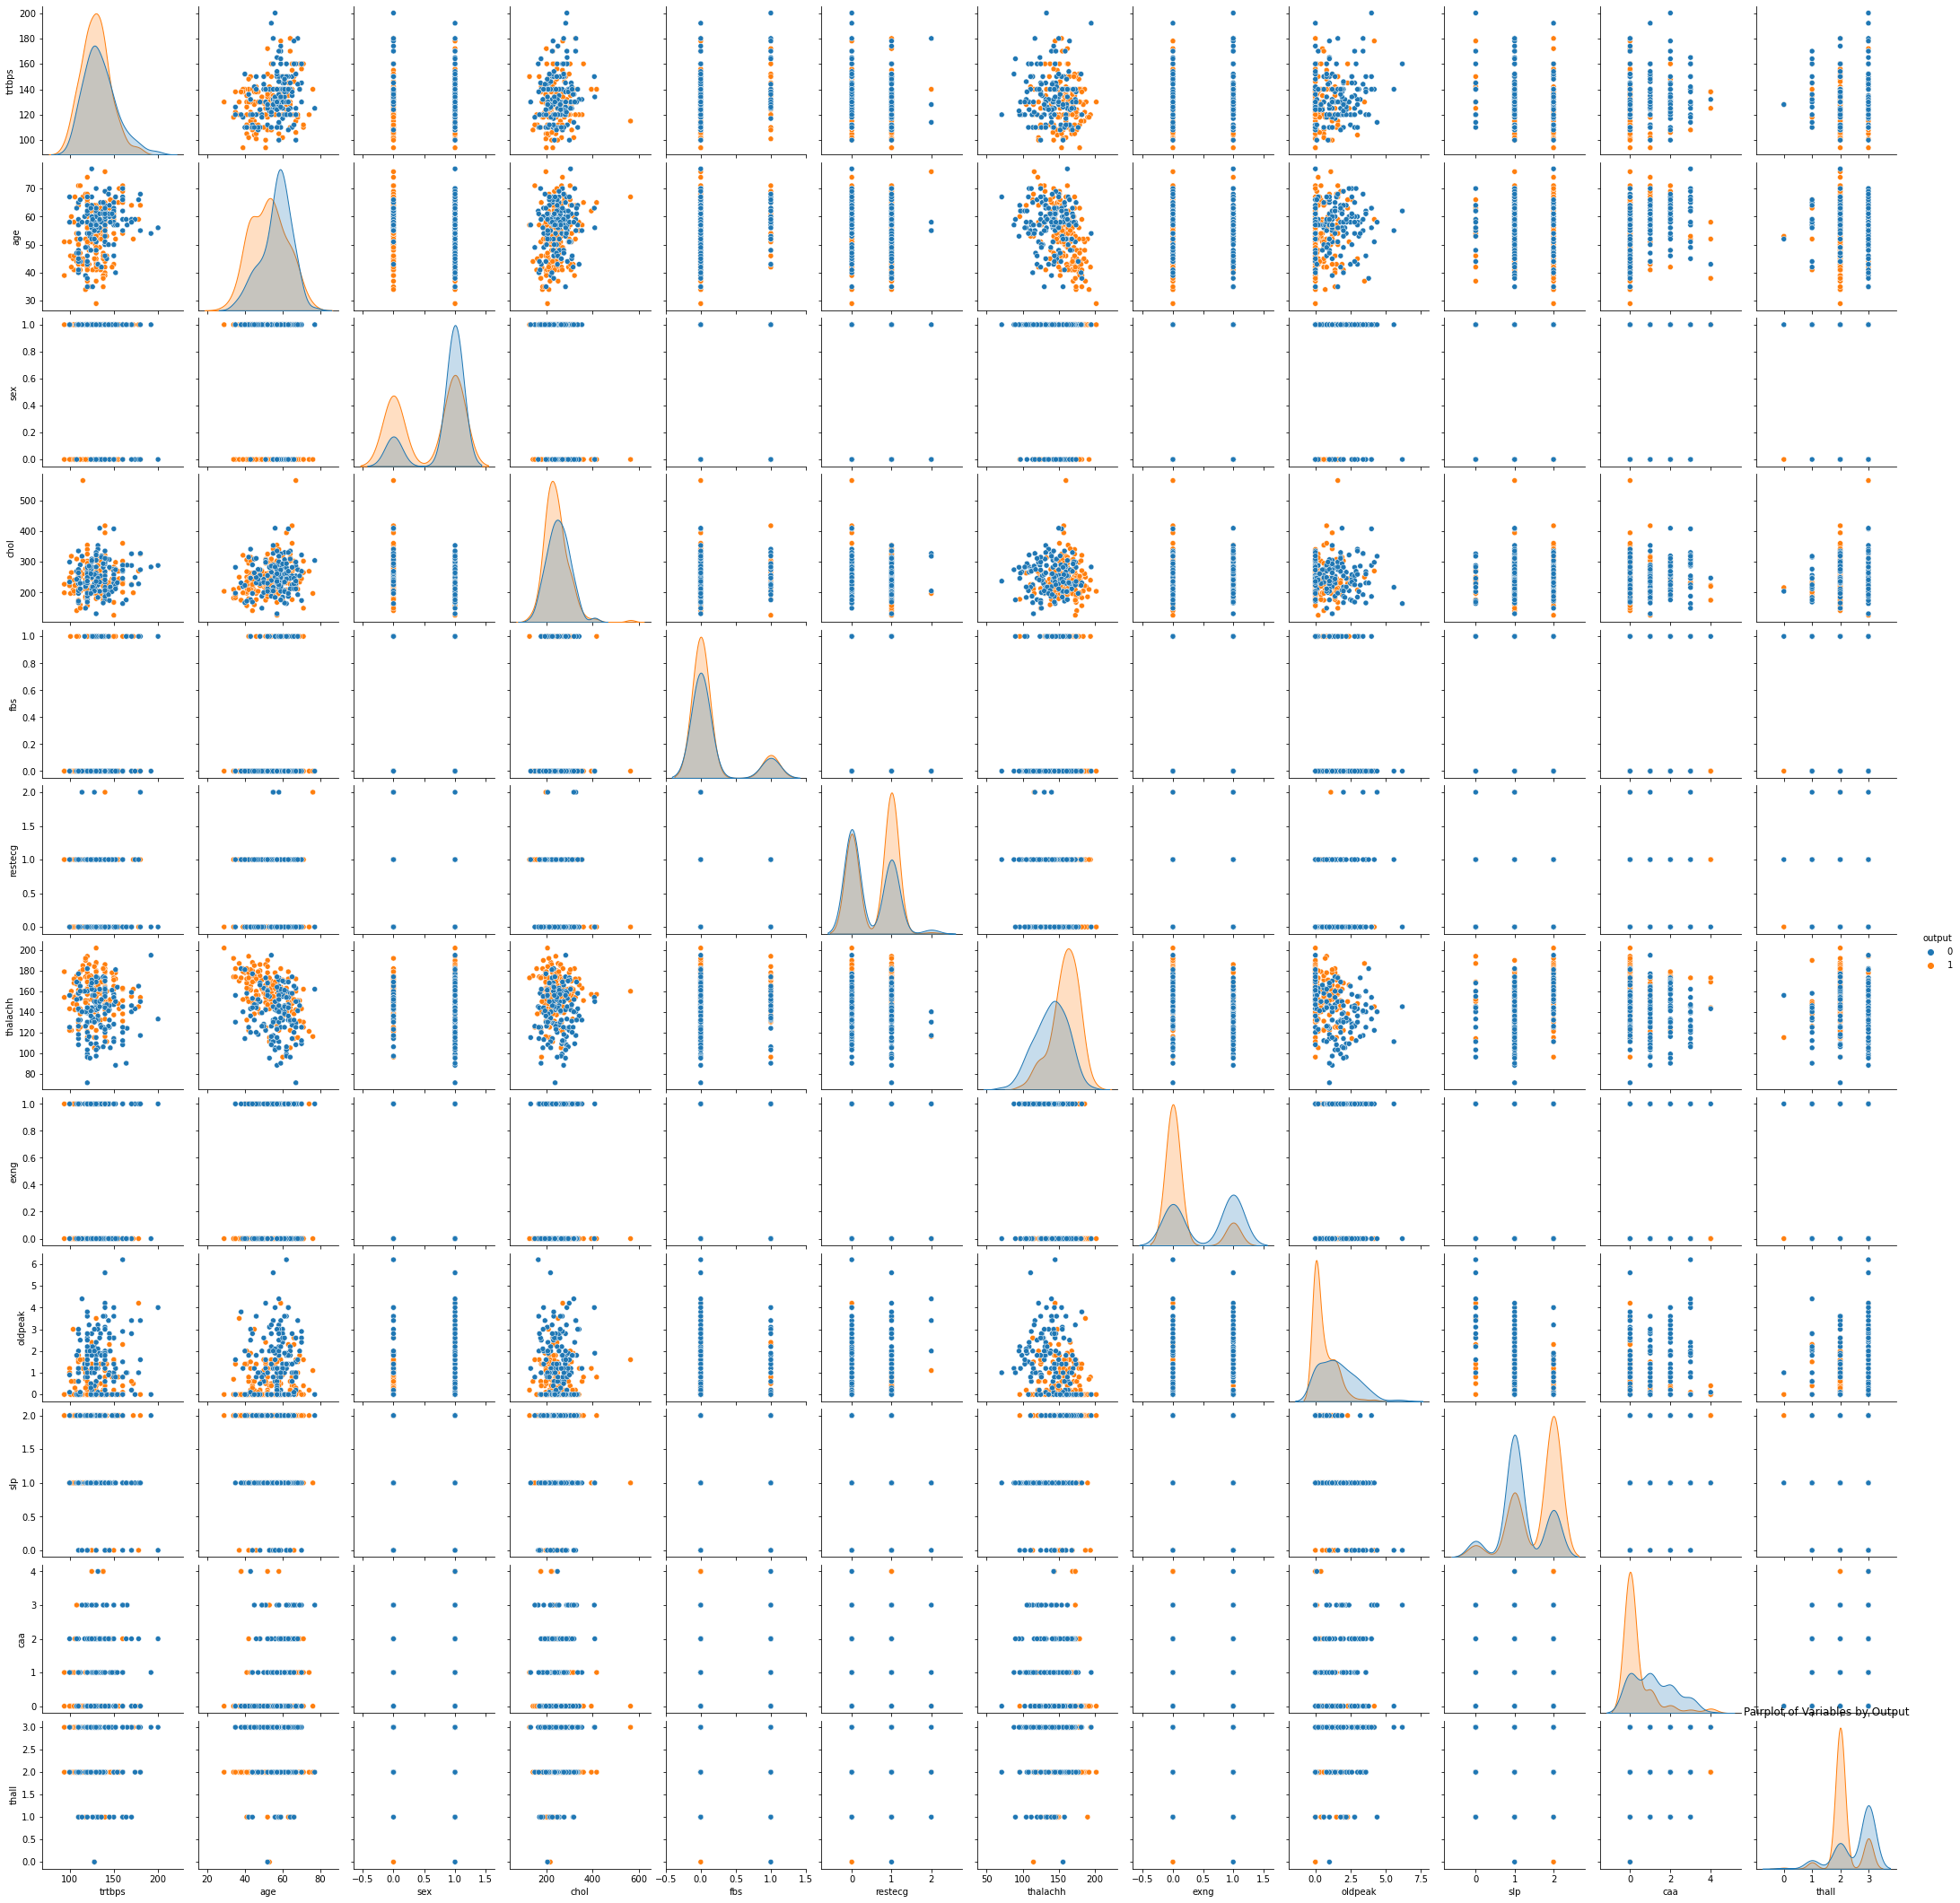

In [19]:
sns.pairplot(data, vars=['trtbps','age','sex','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'],hue="output")
plt.title("Pairplot of Variables by Output")

In [20]:
cor = data.corr(method = 'pearson')
cor


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

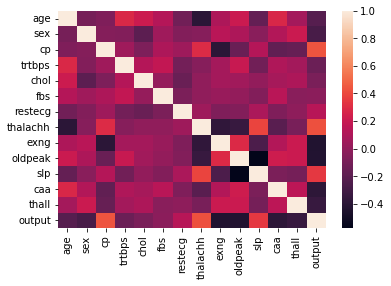

In [42]:
sns.heatmap(cor)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for maximum heart rate achieved by Output')

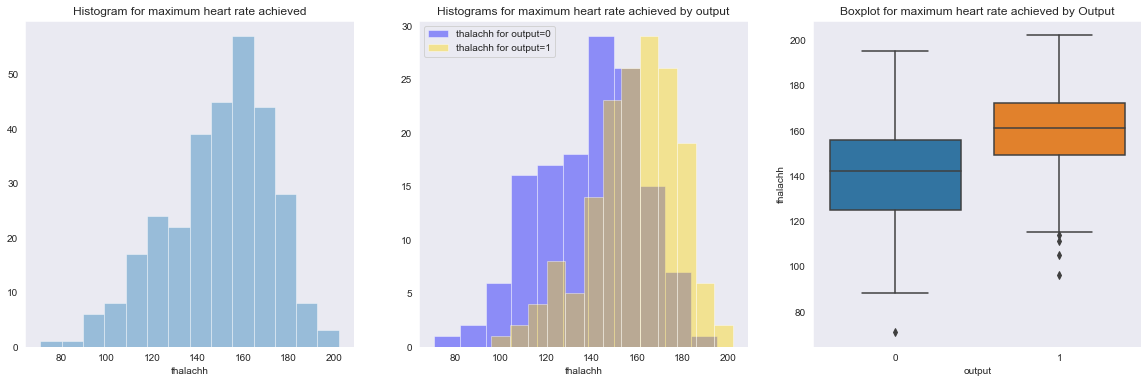

In [25]:
data1 = data[data.output==1]
data0 = data[data.output==0]
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for maximum heart rate achieved")
sns.distplot(data.thalachh,kde=False)
plt.subplot(1,3,2)
sns.distplot(data0.thalachh,kde=False,color="Blue", label="thalachh for output=0")
sns.distplot(data1.thalachh,kde=False,color = "Gold", label = "thalachh for output=1")
plt.title("Histograms for maximum heart rate achieved by output")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=data.output,y=data.thalachh)
plt.title("Boxplot for maximum heart rate achieved by Output")
